# Skript: Datenvisualisierung Python

### Scatterplot, Barplot, Lineplot

---


In [173]:
import seaborn as sns
import numpy as np

In [3]:
# Heutige Datensätze:
taxis = sns.load_dataset('taxis')
flights = sns.load_dataset('flights')

In [4]:
# Anschauen:
taxis.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [5]:
# Anschauen:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


# 0. Plot-Stil

---

Mit `sns.set_style()` können wir einen generellen Plot-Stil für alle Plots des Notebooks einstellen.

Verfügbare Styles: `white`, `whitegrid`, `dark`, `darkgrid` und `ticks`

[Übersicht](https://github.com/holtzy/The-Python-Graph-Gallery/blob/master/src/notebooks/104-seaborn-themes.ipynb)

Es können auch eigene Styles definiert werden, sowie ein 'Kontext' und eine Standard-Farbpalette festgelegt werden. Dazu später mehr.

In [13]:
# Für den Rest des Notebooks festlegen:
sns.set_style('whitegrid')

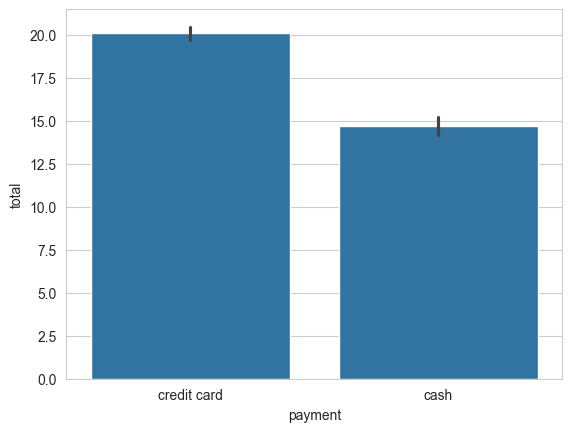

In [14]:
# Beispielplot:
sns.barplot(
    taxis,
    x='payment',
    y='total',
);

# Quizfrage: Was bedeuten eigentlich die Säulenhöhe/ was zeigen sie an?
# Und wofür stehen die schwarzen Striche?
# Balkenhöhe ist der Mittelwert (estimator='mean').
# Die Striche zeigen das 95%-Konfidenzintervall für den Mittelwert an.

In [15]:
# Anzahl Zeilen:
len(taxis)

6433

In [16]:
# Anzahl Bezahlarten:
taxis['payment'].value_counts()

payment
credit card    4577
cash           1812
Name: count, dtype: int64

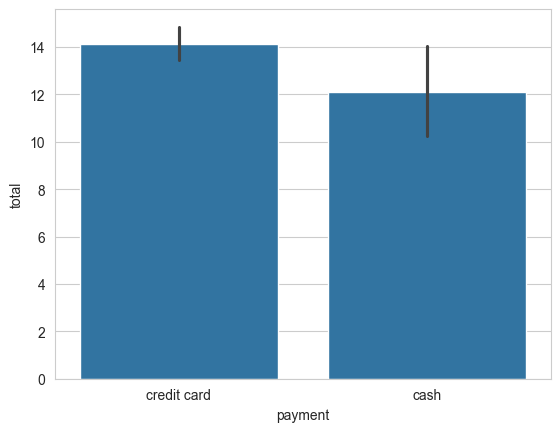

In [17]:
# Standardplot hat mean als Schätzer (estimator):
sns.barplot(
    taxis,
    x='payment',
    y='total',
    estimator='std'
);

# Es gibt andere Schätzer wie median, std, sum

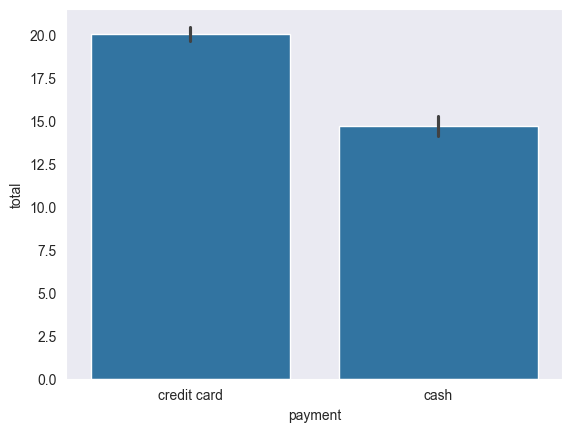

In [18]:
# Mit Kontext-Manager Stil nur für einen Plot festlegen:
with sns.axes_style('dark'):
    sns.barplot(taxis, x='payment', y='total')

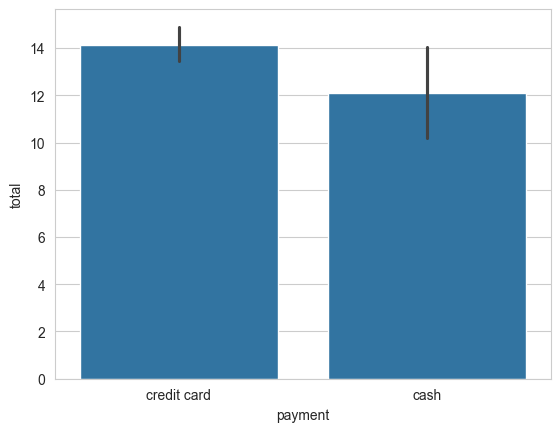

In [19]:
# Danach wieder alles "beim Alten":
sns.barplot(
    taxis,
    x='payment',
    y='total',
    estimator='std'
);

# 1. Balkendiagramme / Säulendiagramme / Barplots

---

Säulendiagramme eignen sich, um **Vergleiche zwischen Kategorien** zu visualisieren.

Sind es wenige (< 15) Kategorien, ist ein Säulendiagramm (vertikale Ausrichtung) übersichtlicher.
<br> Sind es viele (>= 15) Kategorien, ist ein Balkendiagramm (horizontale Ausrichtung) übersichtlicher.

In [20]:
taxis.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


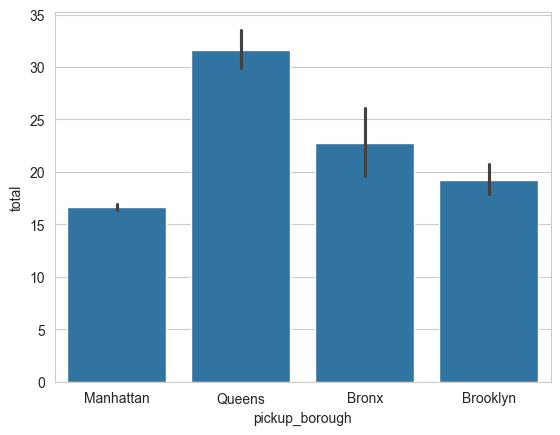

In [22]:
# Einfaches Säulendiagramm mit Konfidenzintervallen:
sns.barplot(taxis, x='pickup_borough', y='total');

In [23]:
taxis['pickup_borough'].value_counts()

pickup_borough
Manhattan    5268
Queens        657
Brooklyn      383
Bronx          99
Name: count, dtype: int64

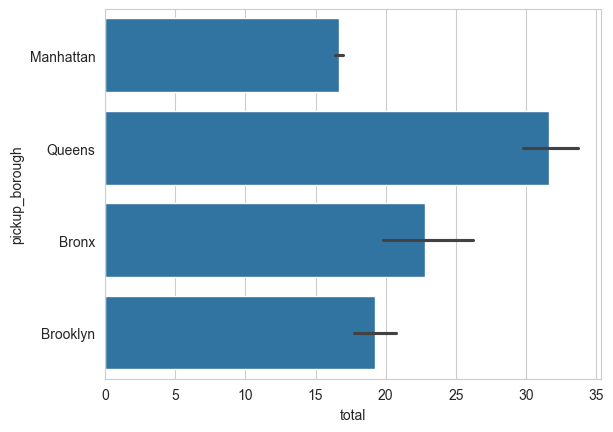

In [26]:
# Einfaches Balkendiagramm mit Konfidenzintervallen:
sns.barplot(taxis, x='total', y='pickup_borough');

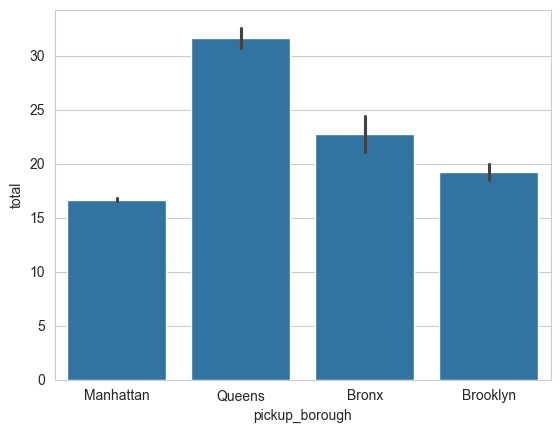

In [37]:
# Einfacher Barplot mit anderen Fehlerbalken:
sns.barplot(
    taxis,
    x='pickup_borough',
    y='total',
    # Bei mean als Estimator ist se sinnvoll
    errorbar='se',
    estimator='mean',
);

# ci = Konfidenzintervall
# pi = Prediction Interval / Vorhersageintervall
# se = Standard Error of the Mean / Standardfehler des Mittelwertes
# sd = Standardabweichung

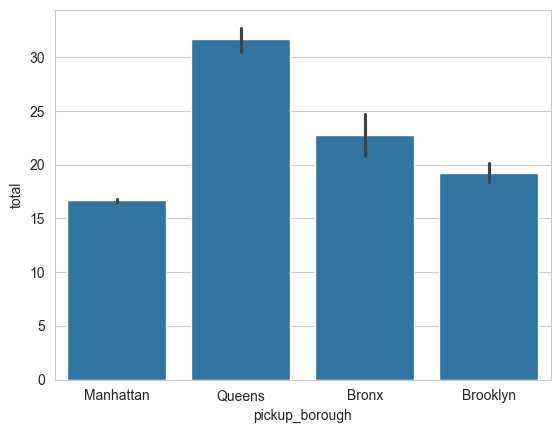

In [41]:
sns.barplot(
    taxis,
    x='pickup_borough',
    y='total',
    # Konfidenzintervall muss als Tupel übergeben werden:
    errorbar=('ci', 75),
    estimator='mean',
);


## Weitere Dimensionen darstellen

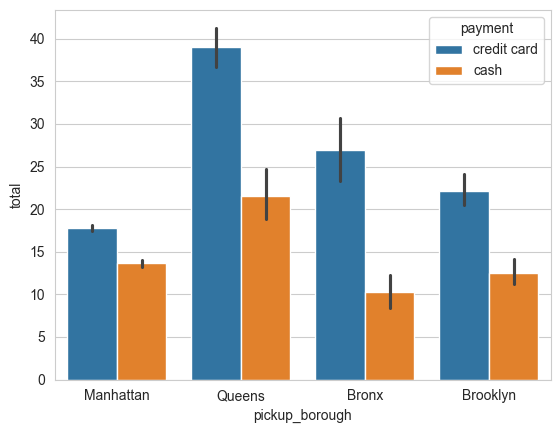

In [43]:
# Gruppierter Barplot:
sns.barplot(
    taxis,
    x='pickup_borough',
    y='total',
    hue='payment',
);

In [44]:
# Gestapeltes Säulendiagramm - am einfachsten mit Pandas möglich:
taxis_pivot = taxis.pivot_table(
    index='pickup_borough',
    columns='payment',
    values='total',
    aggfunc='sum',
)

taxis_pivot

payment,cash,credit card
pickup_borough,,
Bronx,256.30,1997.46
Brooklyn,1493.45,5791.43
Manhattan,19076.13,68305.24
Queens,5735.57,14931.96


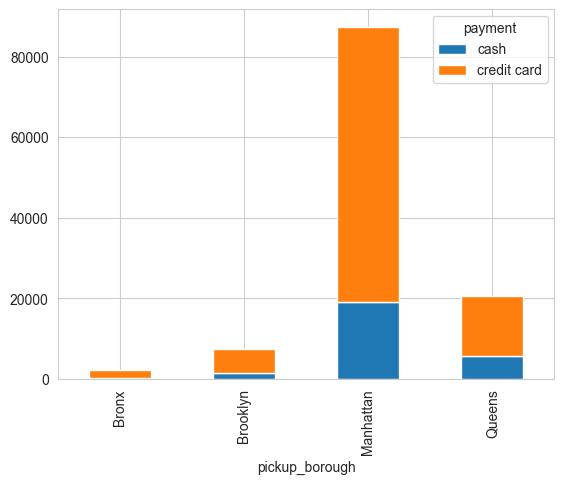

In [46]:
taxis_pivot.plot(kind='bar', stacked=True);

## Stilisierung von Barplots

Viele Aspekte eines Diagramms können über Schlüsselwörter im Funktionsaufruf verändert werden.

Oft verwendete Wörter:

* `color`: Farbe
* `edgecolor / ec`: Randlinienfarbe
* `facecolor`: Füllfarbe
* `palette`: Farbpalette
* `linewidth` / `lw`: Randliniendicke
* `errcolor`: Farbe Fehlerbalken
* `capsize`: Länge der "Kappe" des Fehlers

Achsenbezogene Einstellungen müssen in der Regel am Achsen-Objekt, nicht im Plotaufruf eingestellt werden.

In [49]:
# Welche Taxifarben gibt es?
taxis['color'].unique()

array(['yellow', 'green'], dtype=object)

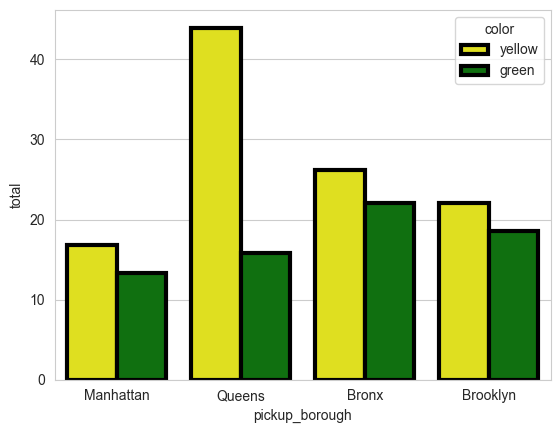

In [62]:
# Gruppierter Barplot:
sns.barplot(
    taxis,
    x='pickup_borough',
    y='total',
    hue='color',
    # Keys sind die Labels, Values sind die eigentlichen Farbwerte
    palette={'yellow': 'yellow', 'green': 'green'},
    ec='black',
    lw=3,
    errorbar=None,
);

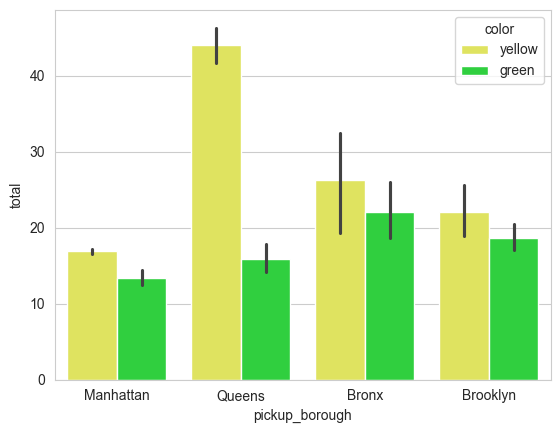

In [54]:
# Individuelle Farbtöne nutzen:
sns.barplot(
    taxis,
    x='pickup_borough',
    y='total',
    hue='color',
    # Keys sind die Labels, Values sind die eigentlichen Farbwerte
    palette={'yellow': '#f4f94a', 'green': '#15ea2a'},
);

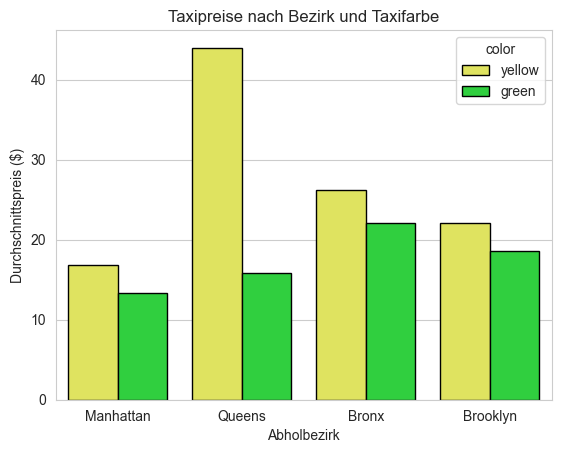

In [73]:
# Anpassung möglich, wenn Plot in Variabel gespeichert wird (mehr am Donnerstag):
ax = sns.barplot(
    taxis,
    x='pickup_borough',
    y='total',
    hue='color',
    # Keys sind die Labels, Values sind die eigentlichen Farbwerte
    palette={'yellow': '#f4f94a', 'green': '#15ea2a'},
    ec='black',
    errorbar=None
)

ax.set(
    title='Taxipreise nach Bezirk und Taxifarbe',
    xlabel='Abholbezirk',
    ylabel='Durchschnittspreis ($)'
);

## Übungsaufgabe Barplot

Lade den 'penguins'-Datensatz und bilde den hier gezeigten Barplot nach!

![image.png](1_penguins_barplot.png)

Weitere Infos zum Anpassen von Diagrammen findest du hier:

* https://matplotlib.org/stable/gallery/color/named_colors.html
* https://www.geeksforgeeks.org/adding-value-labels-on-a-matplotlib-bar-chart/
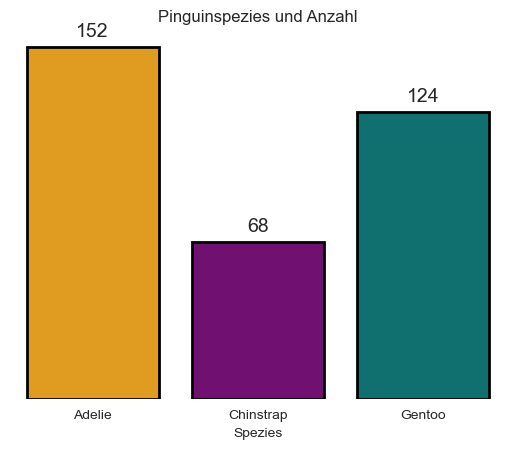
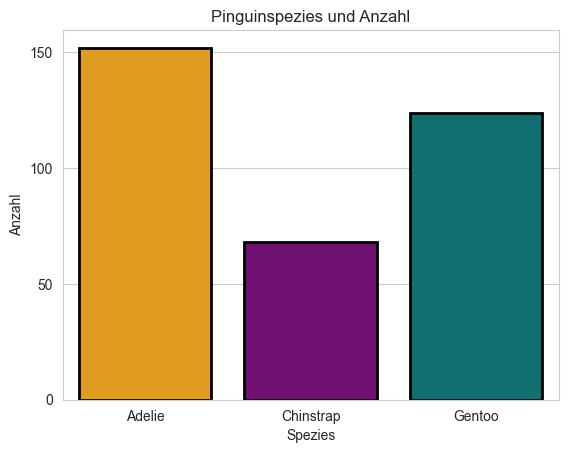

In [74]:
penguins_df = sns.load_dataset('penguins')
penguins_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [75]:
penguins_df.shape

(344, 7)

In [76]:
species_count = penguins_df.groupby('species').size().rename('count')
species_count

species
Adelie       152
Chinstrap     68
Gentoo       124
Name: count, dtype: int64

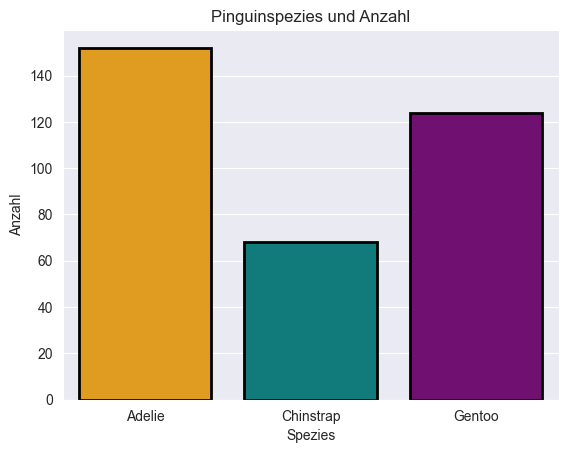

In [78]:
colors = {'Adelie': 'orange',
          'Chinstrap': 'darkcyan',
          'Gentoo': 'purple'}

with sns.axes_style('darkgrid'):
    ax = sns.barplot(x=species_count.index,
                     y=species_count.values,
                     hue=species_count.index,
                     palette=colors,
                     lw=2,
                     ec='black')

    ax.set(xlabel='Spezies',
           ylabel='Anzahl',
           title='Pinguinspezies und Anzahl')

## 2. Lineplot


---

Lineplots eignen sich, um **Veränderungen über Zeit** darzustellen. Eine Linie sollte dabei eine einzige fortlaufende Zeitreihe darstellen. Wenn mehrere Zeitreihen (z.B. Veränderung über Zeit in mehreren Ländern) dargestellt werden, sollten mehrere Linien verwendet werden. 

In [79]:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


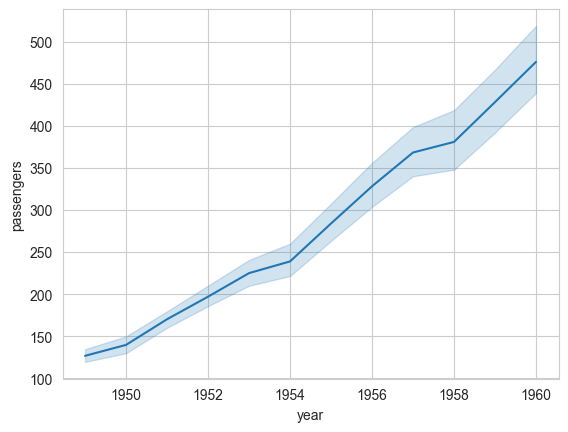

In [80]:
# Einfacher Lineplot:
# Frage: Was sehen wir um die Linie?
sns.lineplot(flights, x='year', y='passengers');
# Die dunkle Linie ergibt sich aus den Mittelwerten pro Jahr.
# Der Bereich um die dicke Linie ist das 95%-Konfidenzintervall.

In [82]:
# Differenz min-max: 56
flights[flights['year'] == 1950].describe()

,year,passengers
count,12.0,12.000000
mean,1950.0,139.666667
std,0.0,19.070841
min,1950.0,114.000000
25%,1950.0,125.750000
50%,1950.0,137.500000
75%,1950.0,151.250000
max,1950.0,170.000000


In [83]:
# Mit zunehmenden Jahren streuen die Monatspassagierzahlen immer breiter,
# was das KI breiter werden lässt:
flights[flights['year'] == 1958].describe()
# Differenz min-max ca. 200

,year,passengers
count,12.0,12.000000
mean,1958.0,381.000000
std,0.0,64.530472
min,1958.0,310.000000
25%,1958.0,339.250000
50%,1958.0,360.500000
75%,1958.0,411.750000
max,1958.0,505.000000


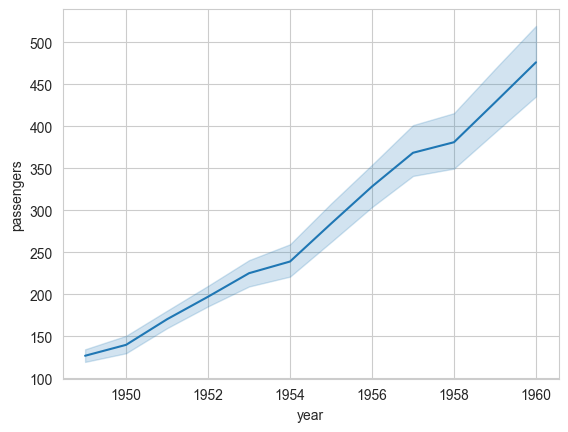

In [90]:
# Das Konfidenzintervall lässt sich über n_boot steuern
sns.lineplot(flights, x='year', y='passengers', n_boot=1000);

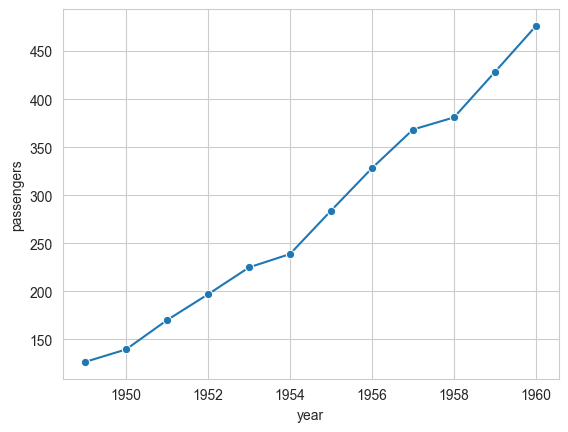

In [93]:
# Nur die Linie + Datenpunkte:
sns.lineplot(flights, x='year', y='passengers', errorbar=None, marker='o');

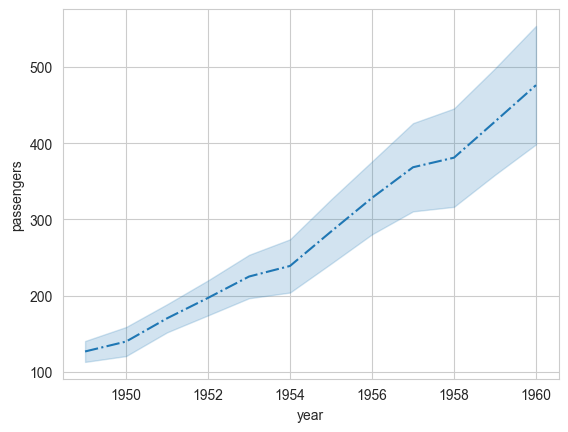

In [100]:
# Lineplot mit bearbeiteter Linie:
sns.lineplot(
    flights,
    x='year',
    y='passengers',
    errorbar='sd',
    estimator='mean',
    ls='dashdot'  # linestyle=...
);

# solid, dashed, dotted, dashdot

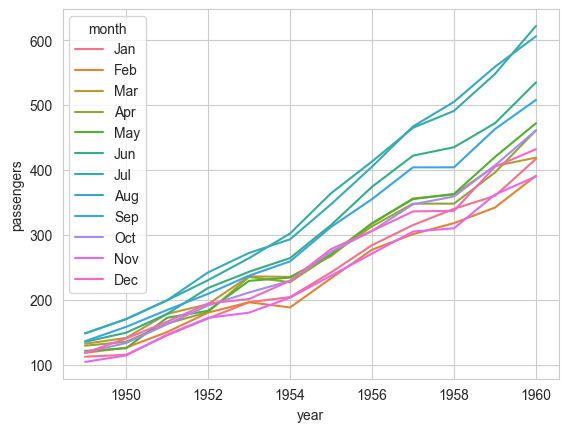

In [102]:
# Gruppierter Lineplot (zu viele Linien!):
sns.lineplot(
    flights,
    x='year',
    y='passengers',
    hue='month'
);

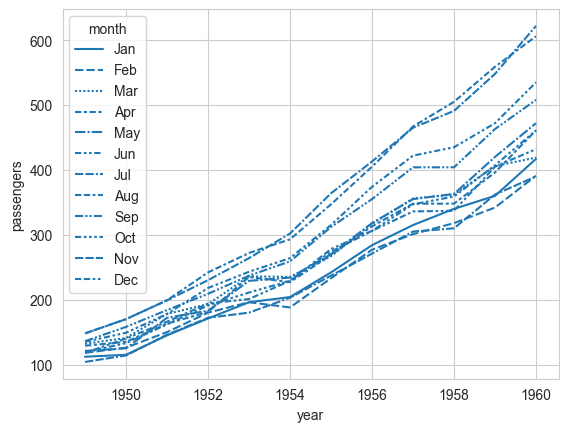

In [103]:
# Gruppierter Lineplot mit Style (ebenfalls unübersichtlich!):
sns.lineplot(
    flights,
    x='year',
    y='passengers',
    style='month',
);

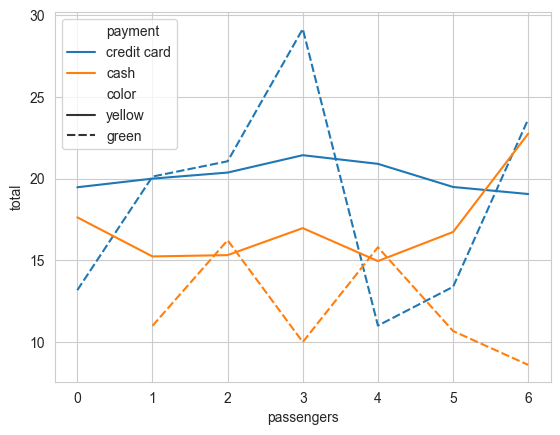

In [106]:
# Mit Hue und Style für zwei separate kategorische Gruppierungen verwenden
# Achtung: Keine Grafik, wie man sie produzieren sollte!
sns.lineplot(
    taxis,
    x='passengers',
    y='total',
    hue='payment',
    style='color',
    errorbar=None
);

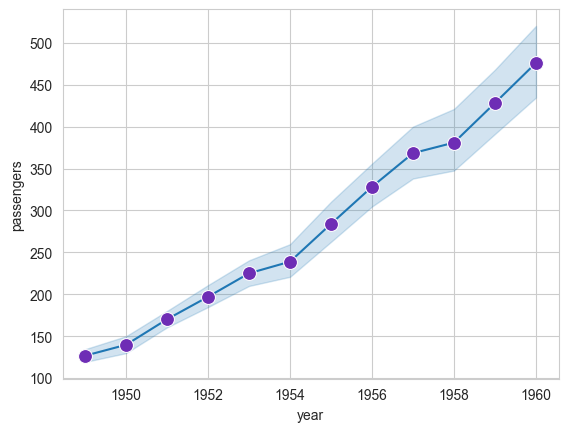

In [120]:
# Marker im Lineplot einsetzen:
sns.lineplot(
    flights,
    x='year',
    y='passengers',
    marker='o',
    markerfacecolor='#6e2db5',
    markersize=10,
);

# o - Kreise
# s - Vierecke
# v - Dreieck
# > - Dreiecke
# + - Plus
# x - X
# *

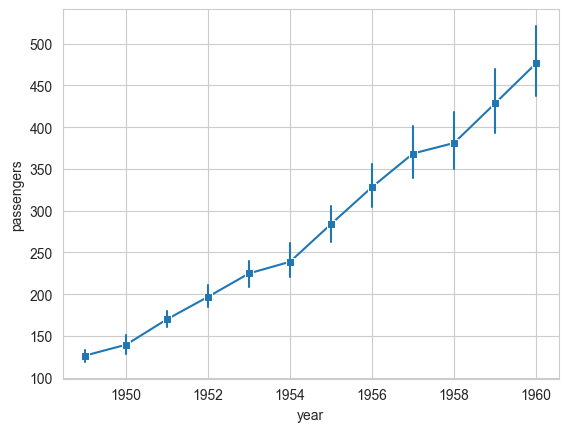

In [123]:
# Fehlerbalken und Marker
sns.lineplot(
    flights,
    x='year',
    y='passengers',
    err_style='bars',
    marker='s',
);

# 3. Scatterplot

---

Scatterplots sind gedacht, um den **Zusammenhang zwischen zwei metrischen Variablen** darzustellen.

Zusätzliche Style-Schlüsselwörter

* `size` / `s` | `markersize` / `ms`: Markierungsgröße (Scatterplot)

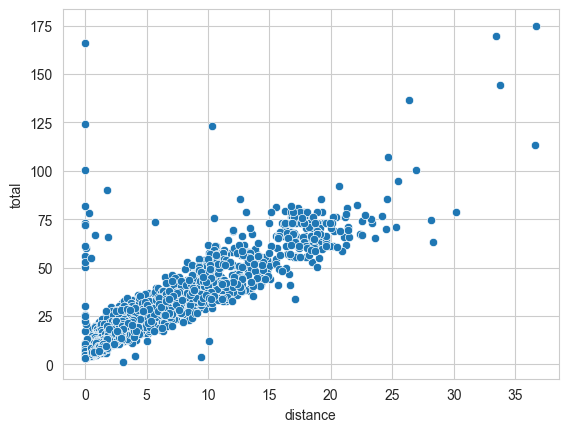

In [126]:
# Einfacher Scatterplot:
sns.scatterplot(taxis,
                x='distance',
                y='total');

## Weitere Dimensionen einbringen

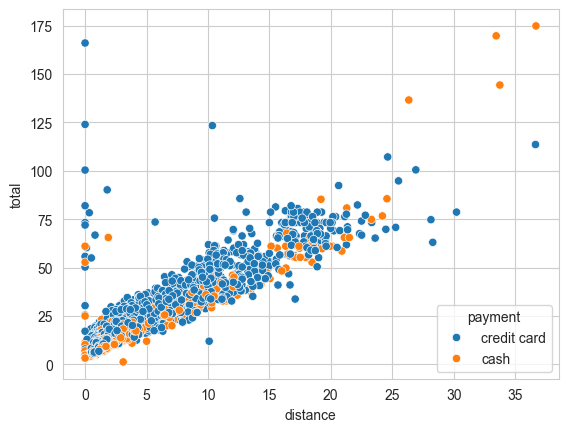

In [127]:
# Gruppierter Scatterplot
sns.scatterplot(
    taxis,
    x='distance',
    y='total',
    hue='payment',
);

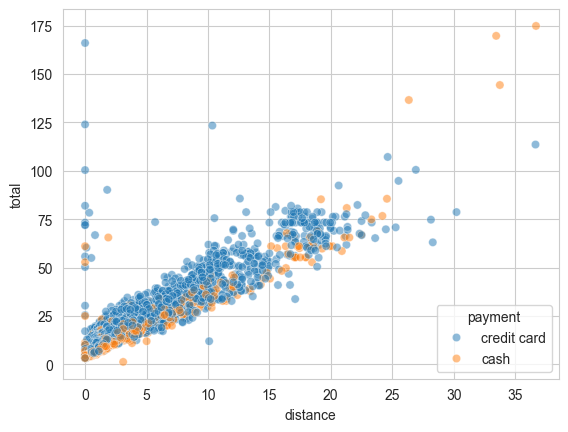

In [137]:
sns.scatterplot(
    taxis,
    x='distance',
    y='total',
    hue='payment',
    alpha=0.5,
);
# alpha bewegt sich zwischen 0 und 1.

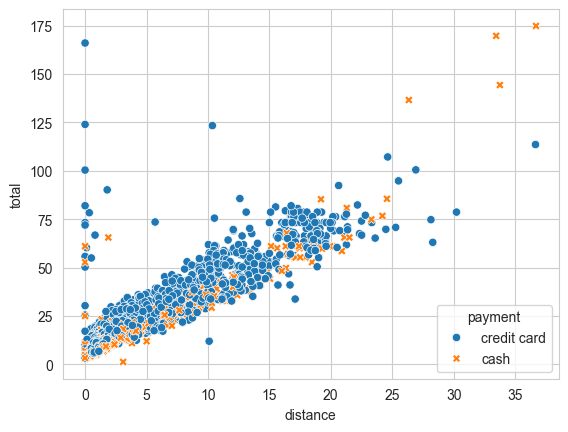

In [140]:
# Gruppierter Scatterplot mit Style (Symbole für Punkte):
sns.scatterplot(
    taxis,
    x='distance',
    y='total',
    hue='payment',
    style='payment',
);

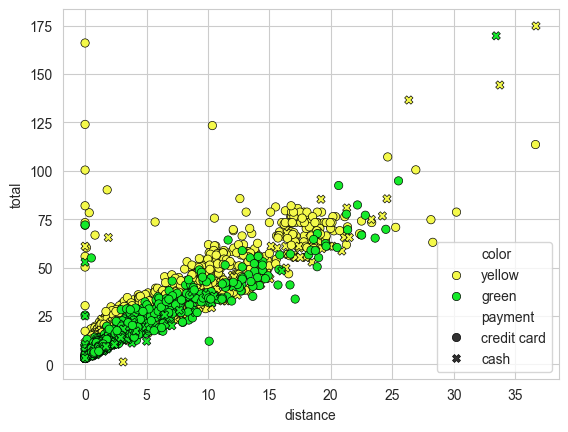

In [144]:
# Style und Hue mit kategorischen Infos:
sns.scatterplot(
    taxis,
    x='distance',
    y='total',
    hue='color',
    style='payment',
    palette={'yellow': '#f4f94a', 'green': '#15ea2a'},
    ec='black'
);

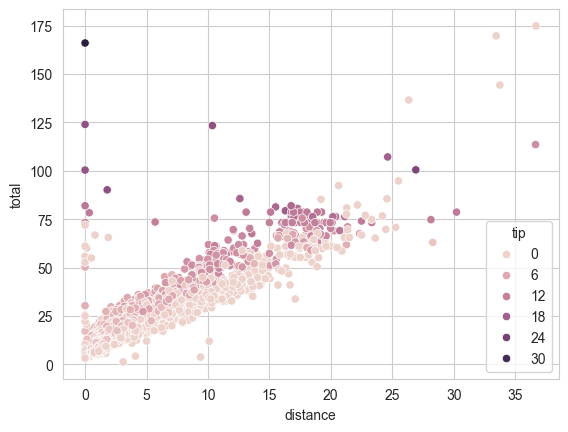

In [146]:
# Numeric Hue:
sns.scatterplot(
    taxis,
    x='distance',
    y='total',
    hue='tip'
);

# Quizfrage: Was macht dieser Numeric Hue hier eigentlich?
# Teilt eine metrische Variabel in gewisse Abstände ein und verleiht einzelnen Werten Farbtöne
# Zwischenfarbtöne bedeuten Zwischenwerte (kontinuierliche Farbskala im Hintergrund):

In [148]:
# Gibt es als Tip wirklich nur diese 6 Werte? Test:
# So viele Werte gibt es wirklich.
len(taxis['tip'].unique())

489

In [149]:
taxis['tip'].agg(['min', 'max'])

min     0.0
max    33.2
Name: tip, dtype: float64

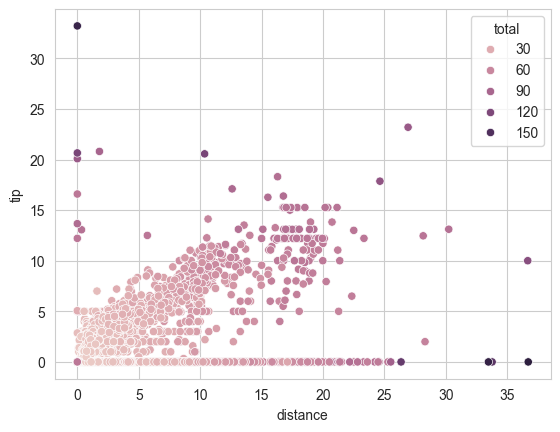

In [150]:
# Bei breiter gefächerten Daten entsprechend größere Schrittweite in der Legende:
sns.scatterplot(
    taxis,
    x='distance',
    y='tip',
    hue='total'
);


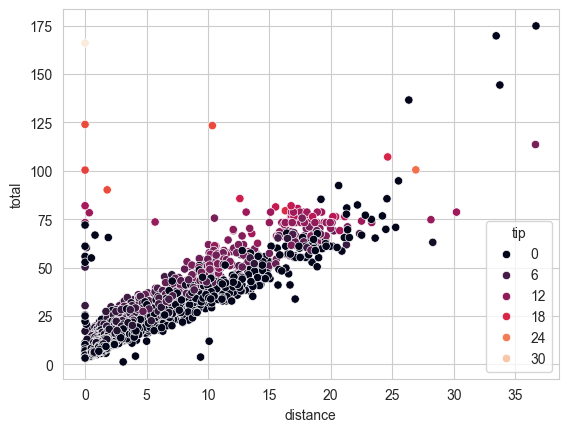

In [159]:
# Hue-Farbe ändern
# Farbpaletten: https://seaborn.pydata.org/tutorial/color_palettes.html
sns.scatterplot(
    data=taxis,
    x='distance',
    y='total',
    hue='tip',
    palette='rocket',
);

# mit _r Farbskala umdrehen, Bsp.: 'rocket_r'

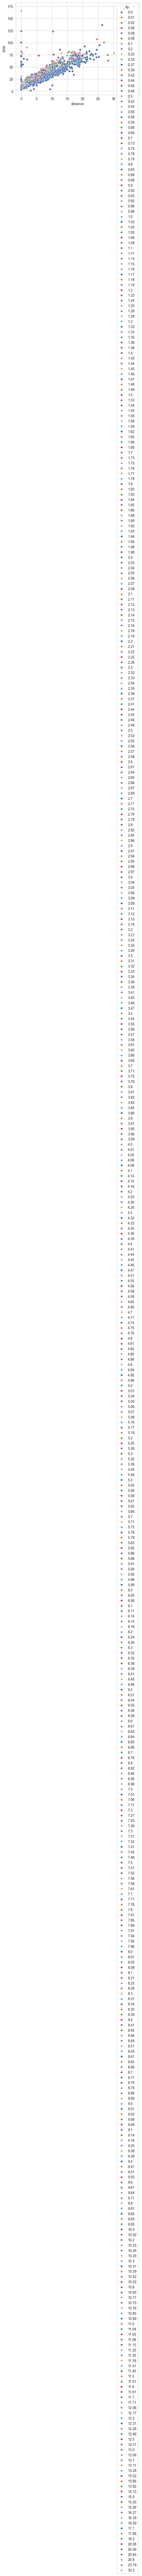

In [160]:
# Quizfrage: Was ist hier passiert?
sns.scatterplot(data=taxis,
                x='distance',
                y='total',
                hue='tip',
                palette='deep');

# Wir nehmen eine zirkuläre Palette für eigentlich kategorische Daten
# und wenden diese auf eine metrische Variable an.
# Für jeden Einzelwert gibt es dadurch eine Farbe
# und weil die Palette zirkulär ist, wiederholen sich die Farbwerte auch noch.

In [ ]:
# Notizen hier:

# Kategorische Farbpalette für sequentielle Daten
# Keine gute Idee!
# 1. Die Farbgebung der Grafik ist nicht interpretierbar
# 2. Die Legende explodiert, weil alle Einzelwerte als Kategorien verstanden werden
# 3. Die Farbpalette wiederholt sich immer wieder und ordnet damit verschiedenen Zahlenwerten dieselben Farbtöne zu!

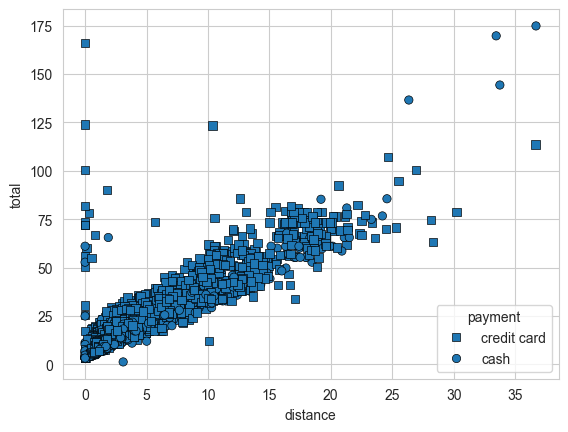

In [165]:
# Marker selbst kontrollieren
# Liste an Markern: https://matplotlib.org/stable/api/markers_api.html

markers = {'credit card': 's', 'cash': 'o'}

sns.scatterplot(
    taxis,
    x='distance',
    y='total',
    style='payment',
    markers=markers,
    ec='black',
);


## Achsen stilisieren

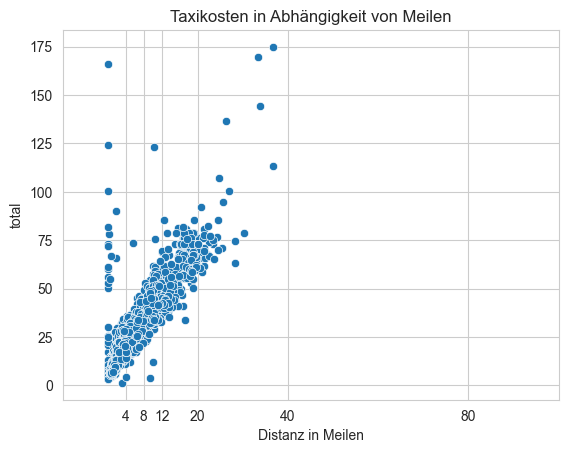

In [170]:
# Einfacher Scatterplot mit Label, Titel, Ticks...
ax = sns.scatterplot(taxis,
                x='distance',
                y='total')

ax.set(
    title='Taxikosten in Abhängigkeit von Meilen',
    xlabel='Distanz in Meilen',
    xticks=[4, 8, 12, 20, 40, 80],
    xlim=[-10, 100],
);

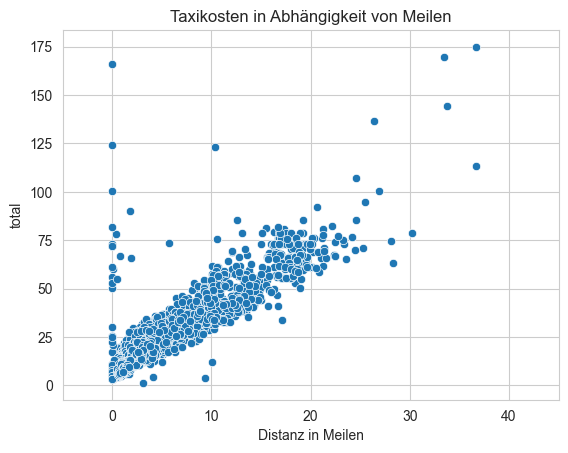

In [177]:
xticks = np.arange(0, 41, 10)
ax = sns.scatterplot(taxis,
                x='distance',
                y='total')

ax.set(
    title='Taxikosten in Abhängigkeit von Meilen',
    xlabel='Distanz in Meilen',
    xticks=xticks,
    xlim=[-5, 45]
);
# Dasselbe Spiel geht auch mit yticks!

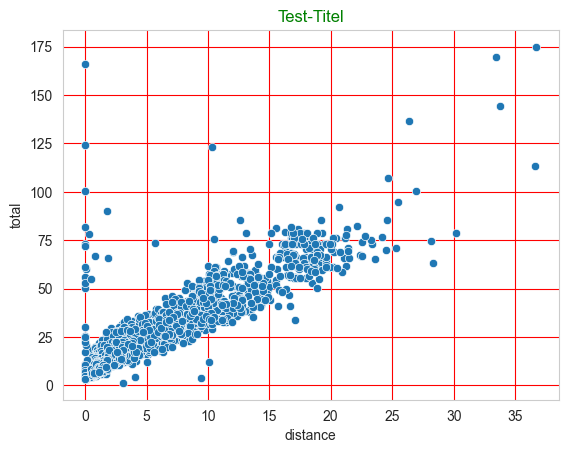

In [180]:
# Einfacher Scatterplot mit farbigem Gitter und farbiger Überschrift
# rc steht für runtime configuration und umfasst eine Reihe von Standard-Einstellungen
# für Plots, mit denen Matplotlib und damit auch Seaborn geladen wird.
# Durch Zugriff auf rc können diese Einstellungen geändert werden.
# Damit diese Veränderung nicht bei jedem weiteren Plot greifen, nutzen wir 'with':
with sns.axes_style(rc={'grid.color': 'red',
                        'text.color': 'green'}):
    ax = sns.scatterplot(taxis, x='distance', y='total')
    ax.set(title='Test-Titel')

## Facettierung / Plotgitter

Um mehrere Plots in einem Gitter anzuordnen kann `relplot` verwendet werden. Relplot kann Line- und Scatterplots erzeugen.

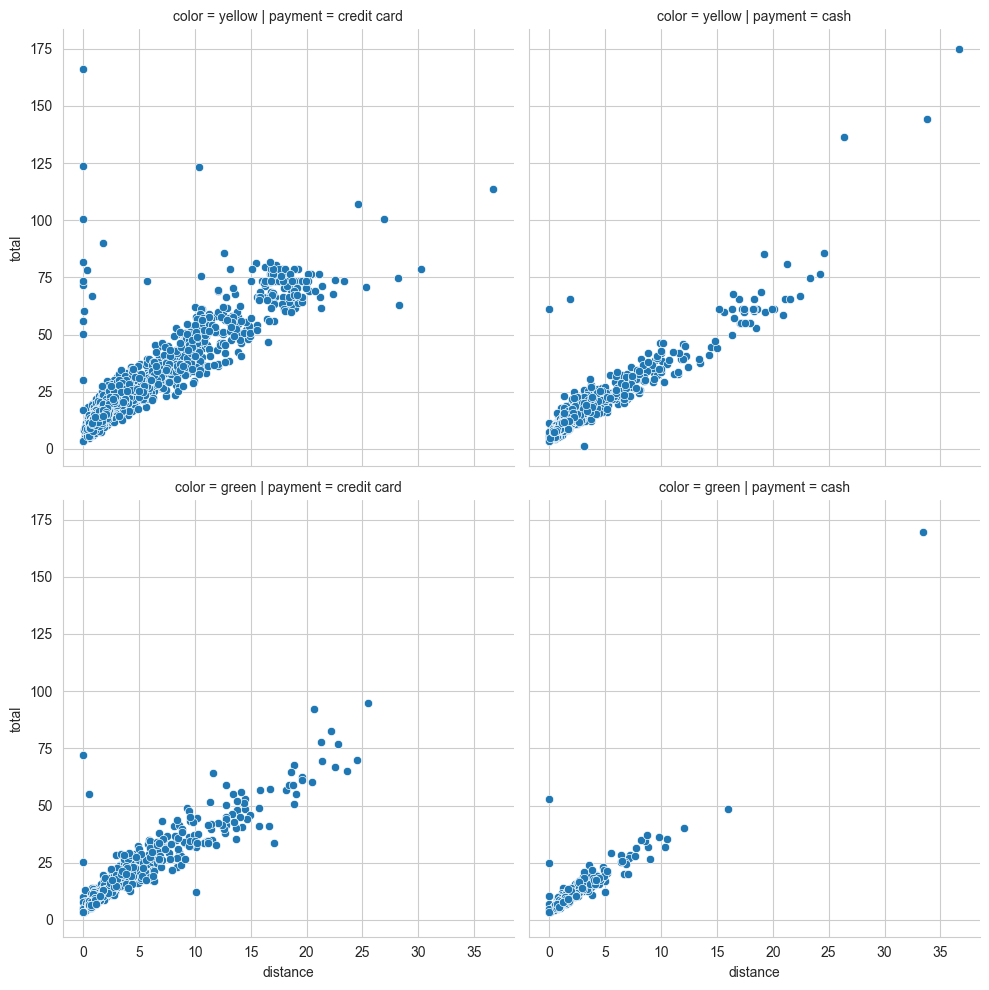

In [184]:
# FacetGrid / auftrennen in mehrere Plots:
sns.relplot(
    taxis,
    x='distance',
    y='total',
    row='color',
    col='payment',
);

## Übungsaufgabe Scatterplot

Lade den `penguins` Datensatz und erstelle den gezeigten Scatterplot.

![2_penguins_plot.png](2_penguins_scatterplot.png)
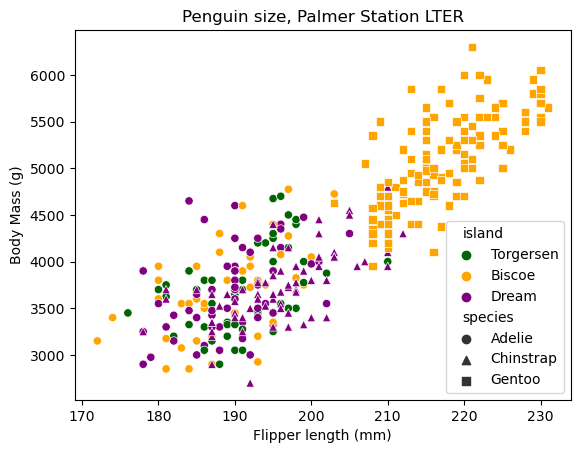

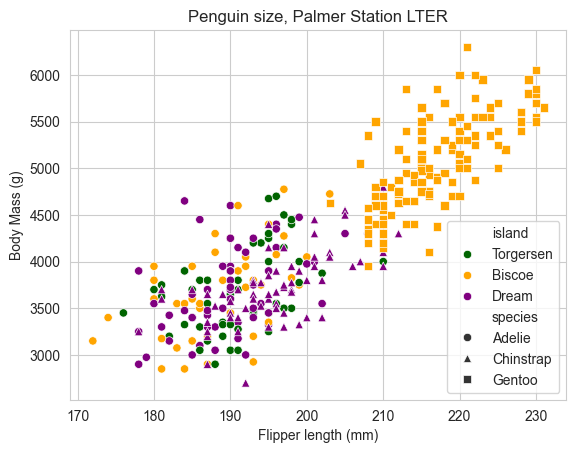

In [185]:
ax = sns.scatterplot(
    penguins_df,
    x='flipper_length_mm',
    y='body_mass_g',
    hue='island',
    style='species',
    markers={'Adelie': 'o', 'Chinstrap': '^', 'Gentoo': 's'},
    palette={'Biscoe': 'orange', 'Torgersen': 'darkgreen',
             'Dream': 'purple'},
)

ax.set(
    ylabel='Body Mass (g)',
    xlabel='Flipper length (mm)',
    title='Penguin size, Palmer Station LTER',
);